In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Human Traffic, Human Cost - IIB Awards - human cost.csv', skiprows = [0,1]) #skips first two rows
data.head(10)
data.columns

Index(['inflation adjusted', 'detail', 'culture / context', 'when?', 'gender',
       'original cost', 'note', 'source', 'link 1', 'link 2', 'Unnamed: 10'],
      dtype='object')

In [3]:
# data.isna()

In [4]:
data = data.drop(['source', 'link 1', 'link 2', 'Unnamed: 10'], axis=1)
data.head(5)

,inflation adjusted,detail,culture / context,when?,gender,original cost,note
0,"4,480",slave (very young child),Ancient Egypt,-500,either,140 silver drachmas,NaN
1,"20,480",slave (8 years old),Ancient Egypt,-500,Female (girl),640 silver drachmas,NaN
2,"32,000",slave,Ancient Egypt,-500,Male,1000 silver drachmas,1 drachma is assumed to be worth 1 day's wage....
3,"2,080",Gladiator,Ancient Rome,0,Male,208 denarii,"120 gladiators cost around 25,000 denarii ($50..."
4,"6,000",slave,Ancient Rome,0,Male (boy),300 denarii,assuming denarius = $20 at this time


In [5]:
for i, value in enumerate(data['gender']):
    value=value.strip().lower()
    data.at[i, 'gender'] = value
    if value== 'either':
        data.at[i, 'gender'] = 'both'
    elif value == 'female (girl)':
        data.at[i, 'gender'] = 'female'
        
    elif value == 'male (boy)':
        data.at[i, 'gender'] = 'male'
data

,inflation adjusted,detail,culture / context,when?,gender,original cost,note
0,"4,480",slave (very young child),Ancient Egypt,-500,both,140 silver drachmas,NaN
1,"20,480",slave (8 years old),Ancient Egypt,-500,female,640 silver drachmas,NaN
2,"32,000",slave,Ancient Egypt,-500,male,1000 silver drachmas,1 drachma is assumed to be worth 1 day's wage....
3,"2,080",Gladiator,Ancient Rome,0,male,208 denarii,"120 gladiators cost around 25,000 denarii ($50..."
4,"6,000",slave,Ancient Rome,0,male,300 denarii,assuming denarius = $20 at this time
5,"12,000",slave,Ancient Rome,0,female,600 denarii,NaN
6,"24,000",slave,Ancient Rome,0,male,1200 denarii,"Roman prices of wheat, wine and meat imply the..."
7,"1,200",Afghanistan Civilian death (Australian Military),Australian Military,2011-2013,both,$1200 AUD,conversation from AUD to USD is virtually one ...
8,"1,300",Male Irish Slave,Caribbean,1650,male,$8,inflation adjusted from 1750 conversion of $8 ...
9,"9,000",Female African girl slave,Caribbean,1650,female,£53-58,NaN


In [6]:
for i, value in enumerate(data['when?']):
    value = str(value).split('-')
    if len(value)!=1:
        if value[0]=='':
            data.at[i,'when?'] = (-1)*int(value[1])
        else:
            data.at[i,'when?'] = int(value[1])
    else:
        if 'saudi' in value[0]:
            data.at[i,'when?'] = 2023
        else:
            data.at[i,'when?'] = int(value[0])
data

,inflation adjusted,detail,culture / context,when?,gender,original cost,note
0,"4,480",slave (very young child),Ancient Egypt,-500,both,140 silver drachmas,NaN
1,"20,480",slave (8 years old),Ancient Egypt,-500,female,640 silver drachmas,NaN
2,"32,000",slave,Ancient Egypt,-500,male,1000 silver drachmas,1 drachma is assumed to be worth 1 day's wage....
3,"2,080",Gladiator,Ancient Rome,0,male,208 denarii,"120 gladiators cost around 25,000 denarii ($50..."
4,"6,000",slave,Ancient Rome,0,male,300 denarii,assuming denarius = $20 at this time
5,"12,000",slave,Ancient Rome,0,female,600 denarii,NaN
6,"24,000",slave,Ancient Rome,0,male,1200 denarii,"Roman prices of wheat, wine and meat imply the..."
7,"1,200",Afghanistan Civilian death (Australian Military),Australian Military,2013,both,$1200 AUD,conversation from AUD to USD is virtually one ...
8,"1,300",Male Irish Slave,Caribbean,1650,male,$8,inflation adjusted from 1750 conversion of $8 ...
9,"9,000",Female African girl slave,Caribbean,1650,female,£53-58,NaN


In [7]:
for i,value in enumerate(data['inflation adjusted']):
    data.at[i, 'inflation adjusted'] = int(str(value).replace(',', ''))


for i,value in enumerate(data['original cost']):
    value = str(value).replace(',', '')
    if '$' in str(value):
        value_string= str(value).replace('$','')
        if 'AUD' in value:
            value_string = value_string.split(' ')
            data.at[i, 'original cost'] = float(value_string[0])
        elif '-' in value:
            value_string = value_string.split('-')
            data.at[i, 'original cost'] = (float(value_string[0])+float(value_string[1]))/2
        else:
            value_string = value_string.replace(' ','')
            data.at[i, 'original cost'] = float(value_string)
    
    elif '£' in str(value):
        value_string= str(value).replace('£','')
        if 'UKP' in value:
            value_string = value_string.split(' ')
            data.at[i, 'original cost'] = float(value_string[0])*1.27
        elif '-' in value:
            value_string = value_string.split('-')
            data.at[i, 'original cost'] = ((float(value_string[0])+float(value_string[1]))/2)*1.27
        else:
            value_string = value_string.replace(' ','')
            data.at[i, 'original cost'] = float(value_string)
            
    value_string = str(value).split(' ')
    if 'drachmas' in value_string:
#         value_string[0]=value_string[0].replace(',', '')
        data.at[i, 'original cost'] = float(value_string[0])*32
    
    elif 'euros' in value_string:
#         value_string[0]=value_string[0].replace(',', '')
        data.at[i, 'original cost'] = float(value_string[0])
        
    elif 'Roubles' in value_string:
#         value_string[0]=value_string[0].replace(',', '')
        data.at[i, 'original cost'] = float(value_string[0])*0.01
    
    elif 'Saudi' in value_string:
        data.at[i, 'original cost'] = ((float(value_string[0])+float(value_string[2]))/2)*0.27
        
    elif 'denarii' in value_string:
        
#         value_string[0]=value_string[0].replace(',', '')
        if 'denarius = $10 at this time' in str(data.at[i, 'note']):
            data.at[i, 'original cost'] = float(value_string[0])*10
        else:
            data.at[i, 'original cost'] = float(value_string[0])*20
                                           
    elif 'yuan' in value_string or 'Yuan' in value_string :
#         value_string[0]=value_string[0].replace(',', '')
        data.at[i, 'original cost'] = (float(value_string[0])/500)*75
        
    elif 'Kyat' in value_string or 'kyat' in value_string :
#         value_string[0]=value_string[0].replace(',', '')
        data.at[i, 'original cost'] = (float(value_string[0])/50000)*37.5
        
    elif 'nan' in value_string :
        data.at[i, 'original cost'] = data.at[i, 'inflation adjusted']

In [8]:
data= data.drop(['note'], axis=1)
data

,inflation adjusted,detail,culture / context,when?,gender,original cost
0,4480,slave (very young child),Ancient Egypt,-500,both,4480
1,20480,slave (8 years old),Ancient Egypt,-500,female,20480
2,32000,slave,Ancient Egypt,-500,male,32000
3,2080,Gladiator,Ancient Rome,0,male,2080
4,6000,slave,Ancient Rome,0,male,6000
5,12000,slave,Ancient Rome,0,female,12000
6,24000,slave,Ancient Rome,0,male,24000
7,1200,Afghanistan Civilian death (Australian Military),Australian Military,2013,both,1200
8,1300,Male Irish Slave,Caribbean,1650,male,8
9,9000,Female African girl slave,Caribbean,1650,female,70.485


In [9]:
data.describe()

,inflation adjusted,detail,culture / context,when?,gender,original cost
count,51,51,51,51,51,51.0
unique,49,44,23,13,3,45.0
top,13500,slave,US,2013,male,700.0
freq,2,4,6,7,20,3.0


Text(0.5, 0, 'Types of slaves')

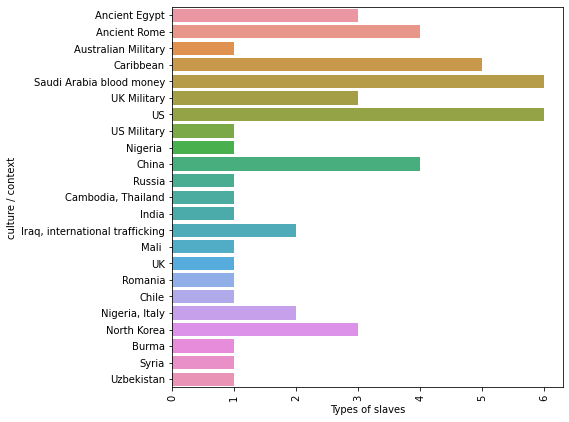

In [10]:
plt.figure(figsize=(7,7))
sns.countplot(data=data, y='culture / context')
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Types of slaves')

In [11]:
data.columns

Index(['inflation adjusted', 'detail', 'culture / context', 'when?', 'gender',
       'original cost'],
      dtype='object')

Text(0.5, 0, 'Types of slaves')

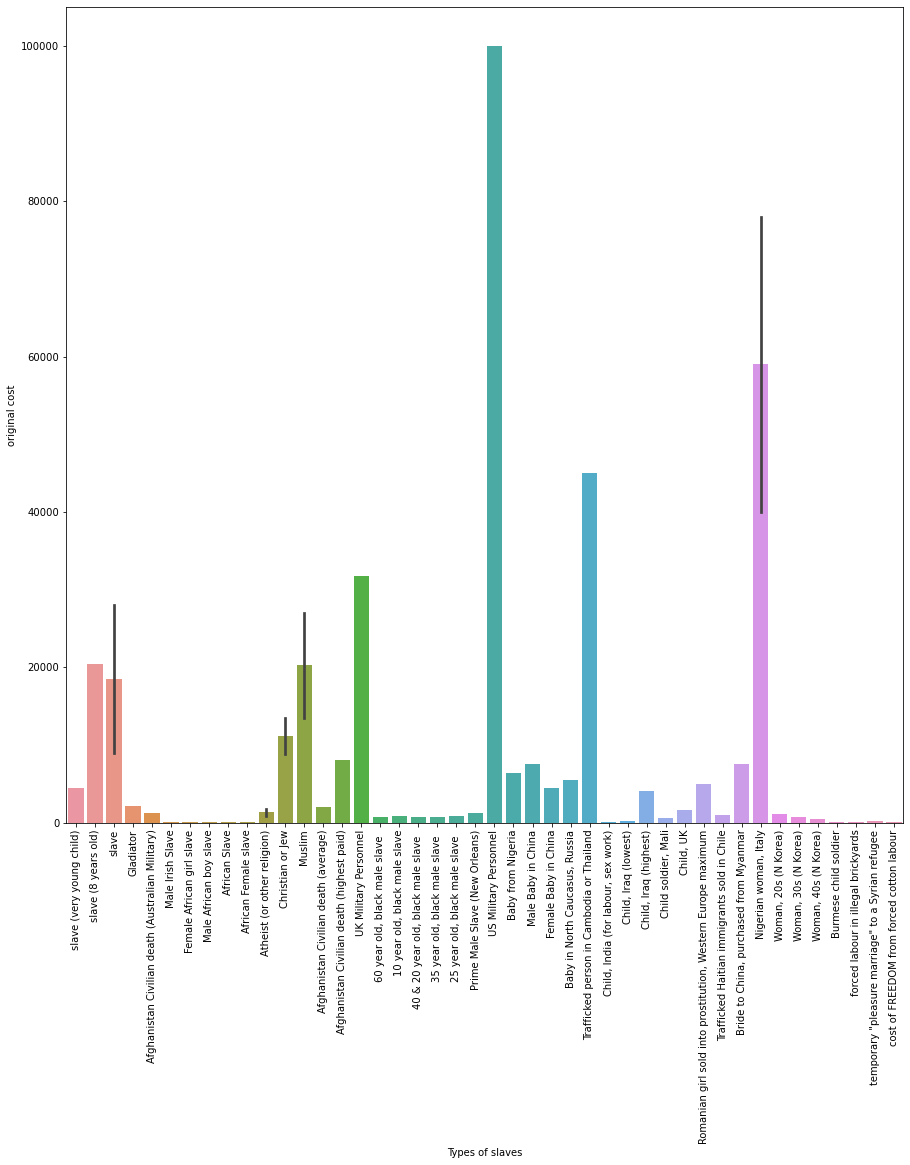

In [12]:
plt.figure(figsize=(15,15))
sns.barplot(data=data, x='detail', y='original cost')
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Types of slaves')

Text(0.5, 0, 'Types of slaves')

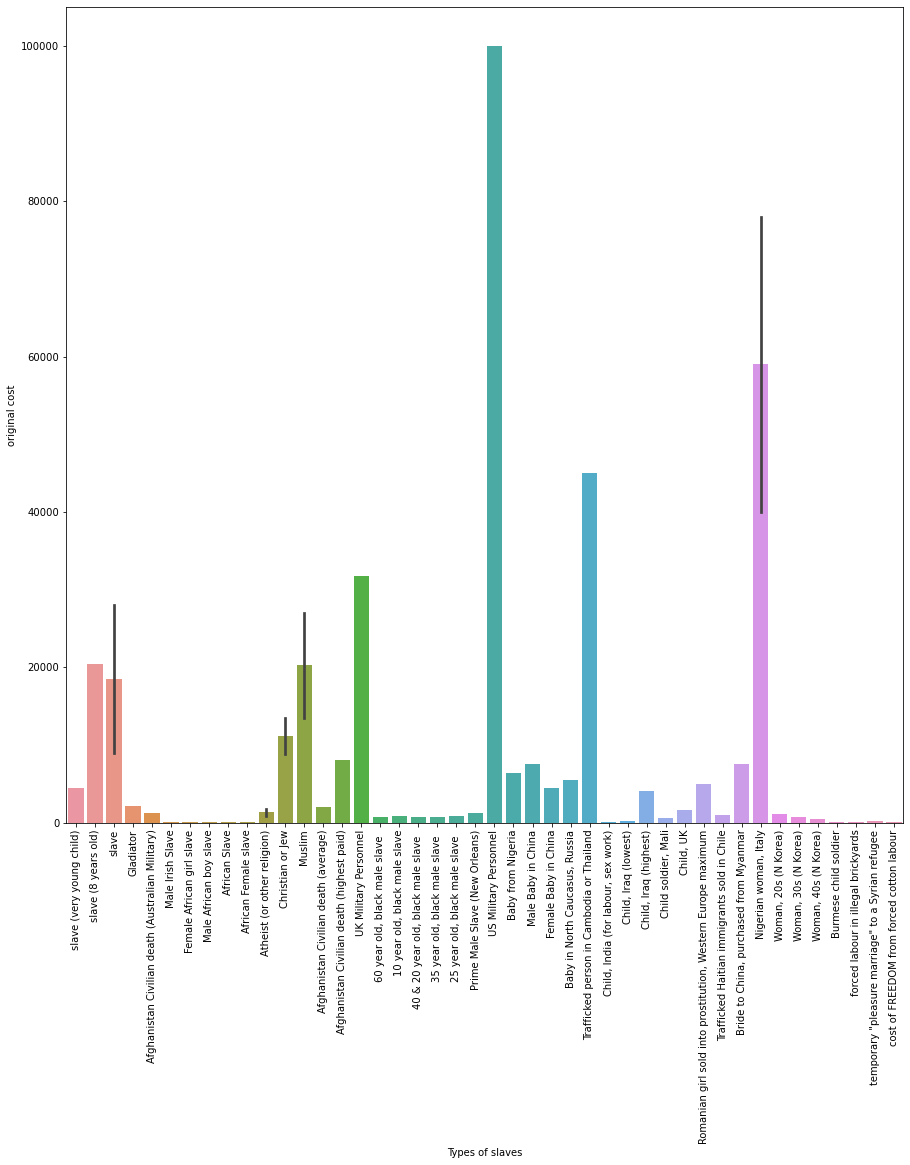

In [29]:
plt.figure(figsize=(15,15))
sns.barplot(data=data, x='detail', y='original cost')
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Types of slaves')

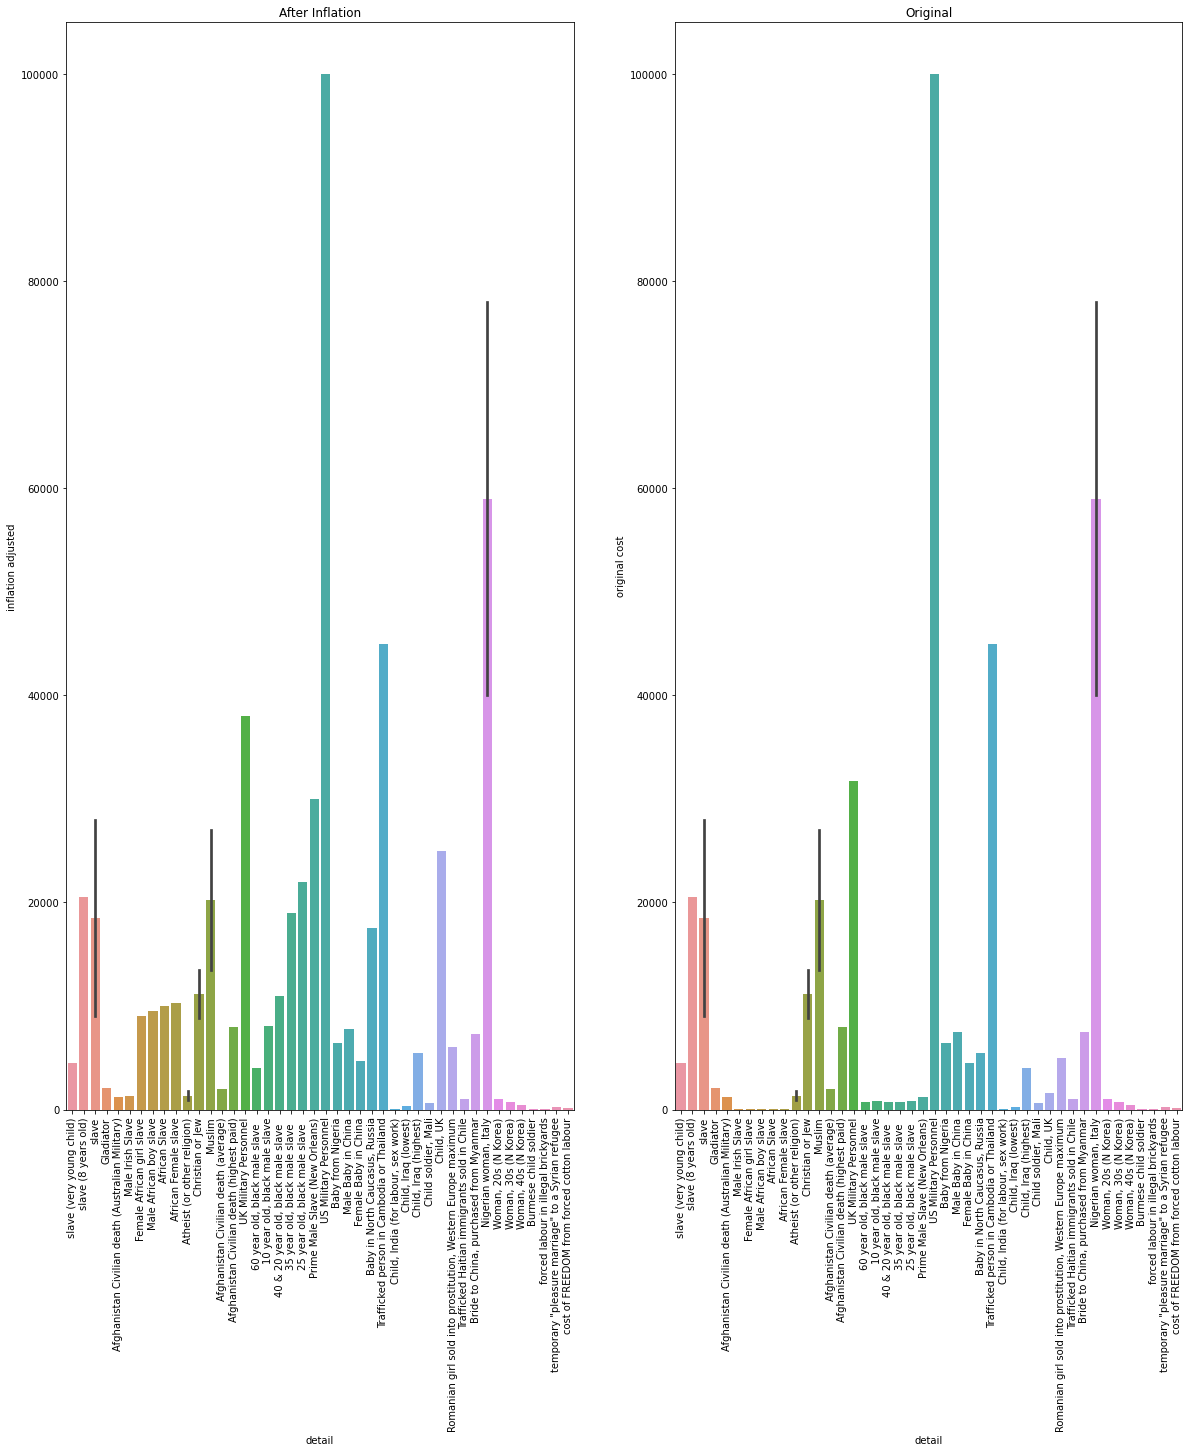

In [14]:
fig, axes = plt.subplots(1,2, figsize=(20,20))
sns.barplot(data=data, x='detail', y='inflation adjusted', ax=axes[0])
axes[0].set_title('After Inflation')
axes[0].tick_params(axis='x', rotation=90)


sns.barplot(data=data, x='detail', y='original cost', ax=axes[1])
axes[1].set_title('Original')
axes[1].tick_params(axis='x', rotation=90)

In [15]:
data['original cost'] = data['original cost'].astype(float)
data['inflation adjusted'] = data['inflation adjusted'].astype(float)

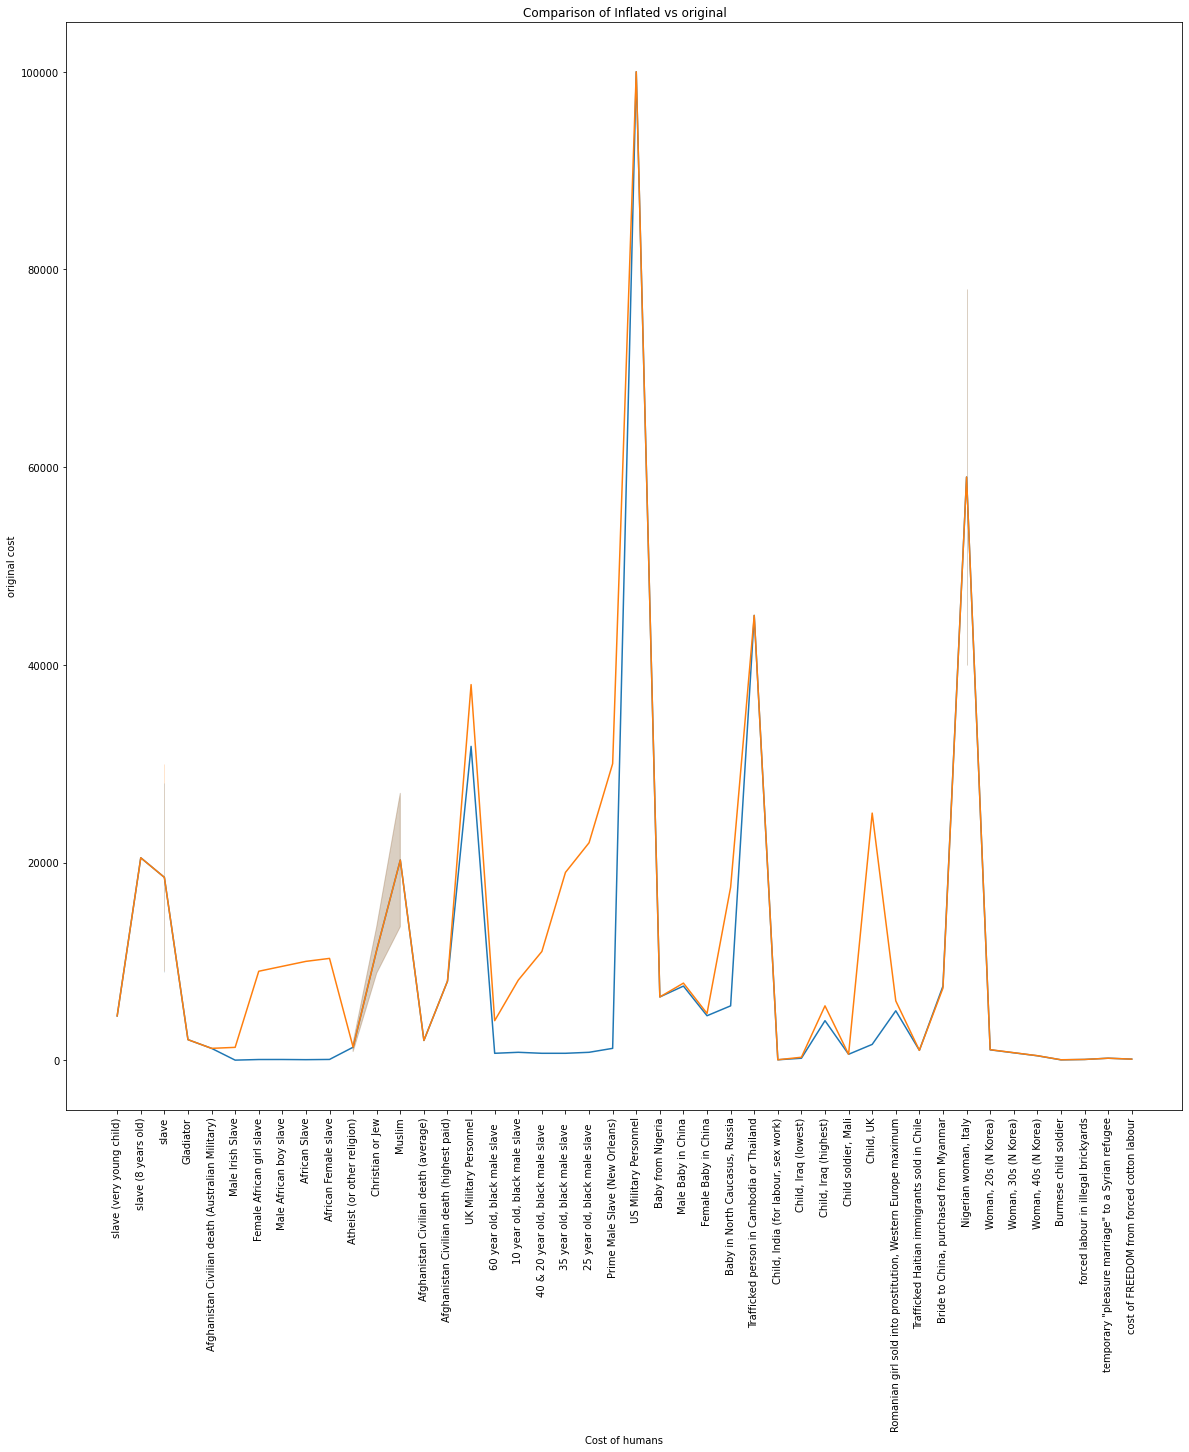

In [16]:
plt.figure(figsize=(20,20))
sns.lineplot(data=data, x='detail', y='original cost')
sns.lineplot(data=data, x='detail', y='inflation adjusted')
plt.title('Comparison of Inflated vs original')
plt.xlabel('Human Type')
plt.xlabel('Cost of humans')
plt.tick_params(axis='x', rotation=90)

<Figure size 1440x1440 with 0 Axes>

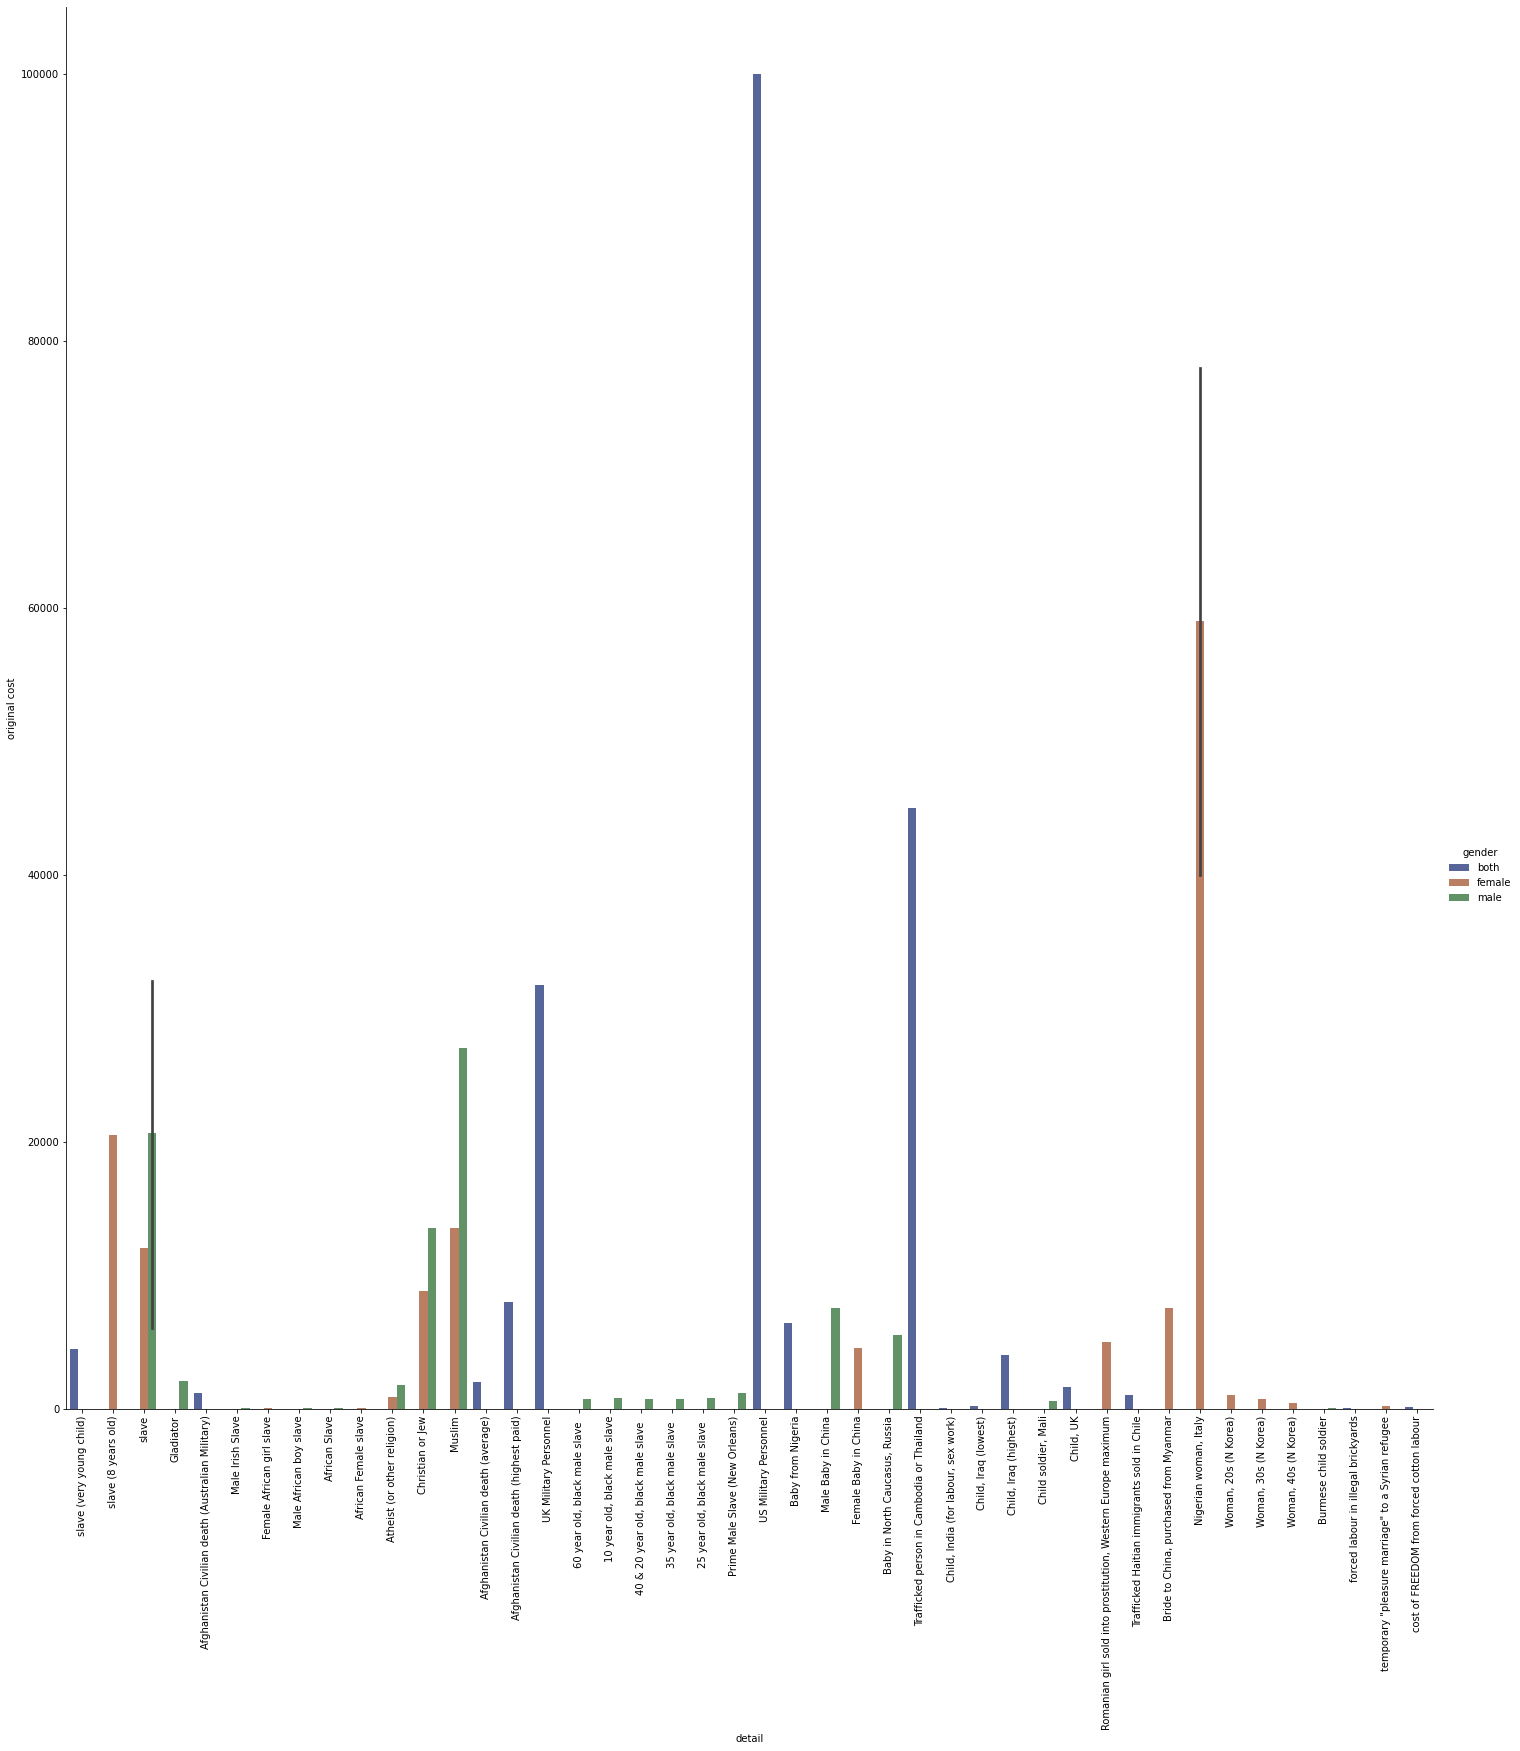

In [25]:
plt.figure(figsize=(20,20))
sns.catplot(
    data=data, kind="bar",
    x="detail", y="original cost", hue="gender",
    palette="dark", alpha=.7, height=20
)
plt.tick_params(axis='x', rotation=90)

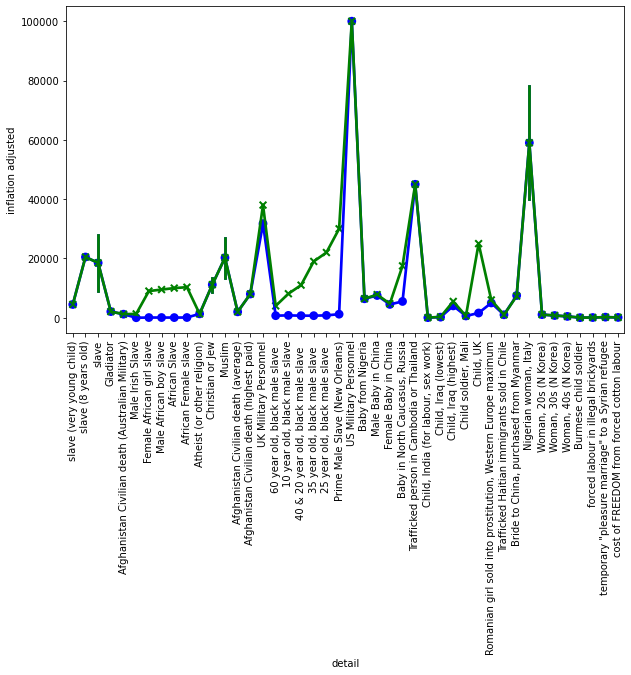

In [30]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.pointplot(x='detail', y='original cost', data=data, color='blue', label='original cost', markers='o')
sns.pointplot(x='detail', y='inflation adjusted', data=data, color='green', label='inflation adjusted', markers='x')
plt.tick_params(axis='x', rotation=90)

In [28]:
data.head(5)

,inflation adjusted,detail,culture / context,when?,gender,original cost
0,4480.0,slave (very young child),Ancient Egypt,-500,both,4480.0
1,20480.0,slave (8 years old),Ancient Egypt,-500,female,20480.0
2,32000.0,slave,Ancient Egypt,-500,male,32000.0
3,2080.0,Gladiator,Ancient Rome,0,male,2080.0
4,6000.0,slave,Ancient Rome,0,male,6000.0


<Figure size 720x432 with 0 Axes>

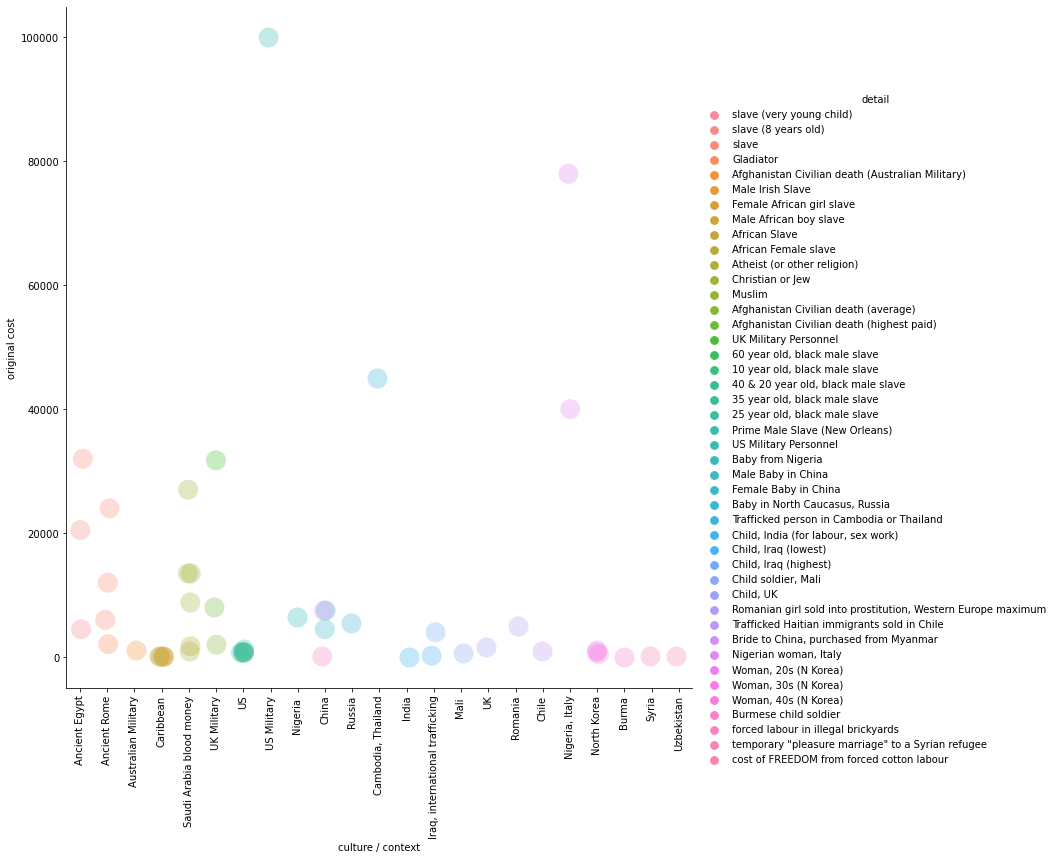

In [40]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.catplot(x='culture / context', y='original cost', hue="detail", data=data, alpha=.3, height=10, s=20)
plt.tick_params(axis='x', rotation=90)